In [21]:
# nasdaq, s&p500, Kospi, Kosdaq data binding
import sys
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
print(os.getcwd())

/Users/heosangbeom


In [25]:
os.chdir("/Users/heosangbeom/Desktop/ML_class/project")

### 총 8개의 Daily Time Series 변수 설정

> 결측치 핸들링 연습을 위해 모든 데이터의 길이를 동일하게 맞추지 않았고, 한국과 미국의 데이터를 기준으로 변수 설정

* 1) 나스닥
* 2) 코스닥
* 3) 코스피
* 4) S&P500
* 5) 원달러 환율
* 6) 국고채 3년물 금리
* 7) 유가
* 8) 비트코인 가격

In [26]:
#1. 나스닥
nasdaq = pd.read_csv("나스닥종합지수 내역.csv")

#2. 코스닥
kosdaq = pd.read_csv("코스닥 내역.csv")

#3. 코스피
kospi = pd.read_csv("코스피지수 내역.csv")

#4. S&P500
sp500 = pd.read_csv("S&P 500 내역.csv")

#5. 원달러 환율
krw_usd = pd.read_csv("원달러 환율_180일.csv")
krw_usd.columns=["date", "er"]

#6. 국고채 3년물 금리
treasury_rate = pd.read_csv("국고채_300일.csv")

#7. 유가
oil_price = pd.read_csv("oil price_1Y.csv")

#8. 비트코인 가격
BTC_price = pd.read_csv("btc_1y.csv")

In [29]:
treasury_rate = treasury_rate.iloc[:,[0,1]] #column 선택
treasury_rate

,Date,rate
0,2020-10-12,0.925
1,2020-10-13,0.923
2,2020-10-14,0.901
3,2020-10-15,0.877
4,2020-10-16,0.888
...,...,...
203,2021-08-02,1.435
204,2021-08-03,1.442
205,2021-08-04,1.418
206,2021-08-05,1.414


In [30]:
nasdaq = pd.DataFrame(nasdaq)
kosdaq = pd.DataFrame(kosdaq)
kospi = pd.DataFrame(kospi)
sp500 = pd.DataFrame(sp500)
krw_usd = pd.DataFrame(krw_usd)
treasury_rate = pd.DataFrame(treasury_rate)
oil_price = pd.DataFrame(oil_price)
BTC_price = pd.DataFrame(BTC_price)

In [31]:
oil_price.columns = ["DATE", "price"]

In [32]:
BTC_price.columns = ["DATE", "price"]

In [33]:
nasdaq = nasdaq[["종가"]]
kosdaq = kosdaq[["종가"]]
kospi = kospi[["종가"]]
sp500 = sp500[["종가"]]
krw_usd = krw_usd[["er"]]
treasury_rate = treasury_rate[["rate"]]
oil_price = oil_price[["price"]]
BTC_price = BTC_price[["price"]]

In [34]:
market_index = pd.concat([nasdaq, kosdaq, kospi, sp500, krw_usd, treasury_rate, oil_price, BTC_price], axis=1)

In [35]:
market_index.columns = ['nasdaq', 'kosdaq', 'kospi', 'sp500', 'krw/usd', "treasury_rate", "oil_price", "BTC_price"]

In [36]:
market_data_d100 = market_index.iloc[:100]

In [37]:
sample_15 = market_data_d100[:15]
sample_15.dtypes

nasdaq            object
kosdaq            object
kospi             object
sp500             object
krw/usd          float64
treasury_rate    float64
oil_price         object
BTC_price         object
dtype: object

In [38]:
nasdaq = sample_15.nasdaq.str.replace(",", "").astype('float')
kosdaq = sample_15.kosdaq.str.replace(',', '').astype('float')
kospi = sample_15.kospi.str.replace(',', '').astype('float')
sp500 = sample_15.sp500.str.replace(',', '').astype('float')
oil_price = sample_15.oil_price.str.replace(',', '').astype('float')
BTC_price = sample_15.BTC_price.str.replace(',', '').astype('float')

In [39]:
nasdaq = pd.DataFrame(nasdaq)
kosdaq = pd.DataFrame(kosdaq)
kospi = pd.DataFrame(kospi)
sp500 = pd.DataFrame(sp500)
oil_price = pd.DataFrame(oil_price)
BTC_price = pd.DataFrame(BTC_price)

market = pd.concat([nasdaq, kosdaq, kospi, sp500, oil_price, BTC_price], axis=1)
market

,nasdaq,kosdaq,kospi,sp500,oil_price,BTC_price
0,14780.5,1059.54,3276.13,4402.68,40.00,11766.62
1,14761.3,1047.93,3280.38,4423.15,40.45,11598.96
2,14681.1,1036.11,3237.14,4387.11,41.33,11780.14
3,14672.7,1037.80,3223.04,4395.26,42.47,11692.76
4,14778.3,1031.14,3202.32,4419.15,43.24,11896.19
5,14762.6,1044.13,3242.65,4400.65,43.37,11387.01
6,14660.6,1035.68,3236.86,4401.46,42.19,11563.16
7,14840.7,1046.55,3232.53,4422.23,44.23,11824.99
8,14837.0,1047.63,3224.95,4411.80,45.12,11785.29
9,14684.6,1055.50,3254.42,4367.48,47.31,11854.27


In [40]:
tobemerged = market_index.loc[:, ["krw/usd", "treasury_rate"]].iloc[:15]
tobemerged

,krw/usd,treasury_rate
0,1119.1,0.925
1,1116.0,0.923
2,1110.1,0.901
3,1103.1,0.877
4,1099.7,0.888
5,1107.7,0.891
6,1105.7,0.911
7,1107.1,0.934
8,1106.5,0.925
9,1110.8,0.910


In [41]:
market

,nasdaq,kosdaq,kospi,sp500,oil_price,BTC_price
0,14780.5,1059.54,3276.13,4402.68,40.00,11766.62
1,14761.3,1047.93,3280.38,4423.15,40.45,11598.96
2,14681.1,1036.11,3237.14,4387.11,41.33,11780.14
3,14672.7,1037.80,3223.04,4395.26,42.47,11692.76
4,14778.3,1031.14,3202.32,4419.15,43.24,11896.19
5,14762.6,1044.13,3242.65,4400.65,43.37,11387.01
6,14660.6,1035.68,3236.86,4401.46,42.19,11563.16
7,14840.7,1046.55,3232.53,4422.23,44.23,11824.99
8,14837.0,1047.63,3224.95,4411.80,45.12,11785.29
9,14684.6,1055.50,3254.42,4367.48,47.31,11854.27


In [43]:
final_index_14d = pd.concat([market, tobemerged], axis=1)

final_index_14d.to_csv('/Users/heosangbeom/Desktop/ML_class/project/final_index_14d.csv')

In [47]:
# 시각화
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

array([[<AxesSubplot:title={'center':'nasdaq'}>,
        <AxesSubplot:title={'center':'kosdaq'}>,
        <AxesSubplot:title={'center':'kospi'}>],
       [<AxesSubplot:title={'center':'sp500'}>,
        <AxesSubplot:title={'center':'oil_price'}>,
        <AxesSubplot:title={'center':'BTC_price'}>],
       [<AxesSubplot:title={'center':'krw/usd'}>,
        <AxesSubplot:title={'center':'treasury_rate'}>, <AxesSubplot:>]],
      dtype=object)

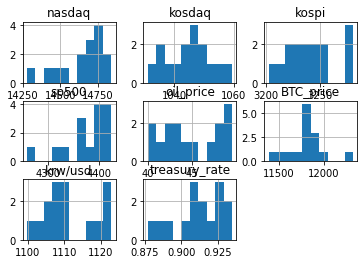

In [48]:
final_index_14d.hist()

In [50]:
# 변수별 표준편차
std = pd.DataFrame(final_index_14d.std()).transpose()
std

,nasdaq,kosdaq,kospi,sp500,oil_price,BTC_price,krw/usd,treasury_rate
0,159.697095,7.832813,22.700561,45.917442,3.351985,210.832645,7.200179,0.017129


In [51]:
# 변수별 평균
mean = pd.DataFrame(final_index_14d.mean()).transpose()
mean

,nasdaq,kosdaq,kospi,sp500,oil_price,BTC_price,krw/usd,treasury_rate
0,14655.706667,1045.316,3242.012667,4377.246,44.900667,11800.203333,1111.36,0.9124


### 데이터 정규화 과정 
* 모든 변수가 정규분포를 따르고 있지는 않으므로, 간단하게 min-max scaling 방법을 선택하여 표준화

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(final_index_14d)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
scaled_data = scaler.transform(final_index_14d)

scaled_data = pd.DataFrame(scaled_data)

scaled_data

,0,1,2,3,4,5,6,7
0,0.893583,1.000000,0.945555,0.875577,0.000000,0.404663,0.836207,0.827586
1,0.859643,0.591197,1.000000,1.000000,0.047569,0.225938,0.702586,0.793103
2,0.717872,0.175000,0.446067,0.780938,0.140592,0.419075,0.448276,0.413793
3,0.703023,0.234507,0.265437,0.830477,0.261099,0.325928,0.146552,0.000000
4,0.889694,0.000000,0.000000,0.975687,0.342495,0.542784,0.000000,0.189655
5,0.861941,0.457394,0.516654,0.863239,0.356237,0.000000,0.344828,0.241379
6,0.681633,0.159859,0.442480,0.868162,0.231501,0.187775,0.258621,0.586207
7,1.000000,0.542606,0.387010,0.994408,0.447146,0.466885,0.318966,0.982759
8,0.993459,0.580634,0.289905,0.931011,0.541226,0.424565,0.293103,0.827586
9,0.724059,0.857746,0.667435,0.661622,0.772727,0.498097,0.478448,0.568966


In [55]:
columns = ["nasdaq", "kosdaq", "kospi", "sp500", "oil_price", "BTC_price", "krw/usd", "treasury_rate"]

In [57]:
scaled_data.columns = columns
scaled_data

,nasdaq,kosdaq,kospi,sp500,oil_price,BTC_price,krw/usd,treasury_rate
0,0.893583,1.000000,0.945555,0.875577,0.000000,0.404663,0.836207,0.827586
1,0.859643,0.591197,1.000000,1.000000,0.047569,0.225938,0.702586,0.793103
2,0.717872,0.175000,0.446067,0.780938,0.140592,0.419075,0.448276,0.413793
3,0.703023,0.234507,0.265437,0.830477,0.261099,0.325928,0.146552,0.000000
4,0.889694,0.000000,0.000000,0.975687,0.342495,0.542784,0.000000,0.189655
5,0.861941,0.457394,0.516654,0.863239,0.356237,0.000000,0.344828,0.241379
6,0.681633,0.159859,0.442480,0.868162,0.231501,0.187775,0.258621,0.586207
7,1.000000,0.542606,0.387010,0.994408,0.447146,0.466885,0.318966,0.982759
8,0.993459,0.580634,0.289905,0.931011,0.541226,0.424565,0.293103,0.827586
9,0.724059,0.857746,0.667435,0.661622,0.772727,0.498097,0.478448,0.568966


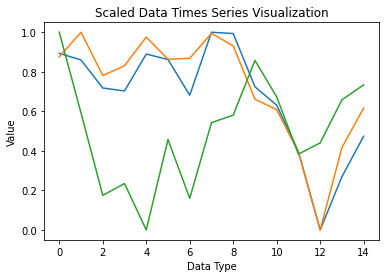

In [127]:
scaled_data["nasdaq"].plot()
scaled_data["sp500"].plot()
scaled_data["kosdaq"].plot()
plt.title("Scaled Data Times Series Visualization")
plt.xlabel("Data Type")
plt.ylabel("Value")
plt.show()

<AxesSubplot:>

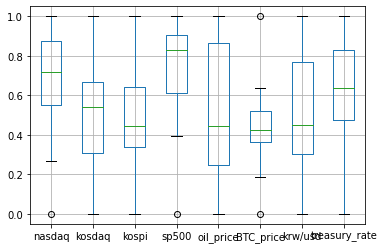

In [128]:
scaled_data.boxplot()

In [65]:
cov = scaled_data.cov()
cov

,nasdaq,kosdaq,kospi,sp500,oil_price,BTC_price,krw/usd,treasury_rate
nasdaq,0.079693,-0.000114,0.002591,0.075285,-0.071907,-0.028420,-0.050637,-0.009538
kosdaq,-0.000114,0.076067,0.059392,-0.009471,0.022325,0.001987,0.054871,0.050782
kospi,0.002591,0.059392,0.084570,0.005503,-0.014814,-0.020876,0.063279,0.042967
sp500,0.075285,-0.009471,0.005503,0.077897,-0.078351,-0.034775,-0.048098,-0.011579
oil_price,-0.071907,0.022325,-0.014814,-0.078351,0.125552,0.046873,0.039409,0.029244
BTC_price,-0.028420,0.001987,-0.020876,-0.034775,0.046873,0.050511,0.006241,0.015016
krw/usd,-0.050637,0.054871,0.063279,-0.048098,0.039409,0.006241,0.096319,0.057672
treasury_rate,-0.009538,0.050782,0.042967,-0.011579,0.029244,0.015016,0.057672,0.087218


In [66]:
corr = scaled_data.corr()
corr

,nasdaq,kosdaq,kospi,sp500,oil_price,BTC_price,krw/usd,treasury_rate
nasdaq,1.000000,-0.001468,0.031560,0.955517,-0.718868,-0.447938,-0.577963,-0.114409
kosdaq,-0.001468,1.000000,0.740488,-0.123041,0.228444,0.032054,0.641046,0.623465
kospi,0.031560,0.740488,1.000000,0.067796,-0.143769,-0.319415,0.701125,0.500298
sp500,0.955517,-0.123041,0.067796,1.000000,-0.792277,-0.554391,-0.555284,-0.140481
oil_price,-0.718868,0.228444,-0.143769,-0.792277,1.000000,0.588599,0.358368,0.279460
BTC_price,-0.447938,0.032054,-0.319415,-0.554391,0.588599,1.000000,0.089481,0.226240
krw/usd,-0.577963,0.641046,0.701125,-0.555284,0.358368,0.089481,1.000000,0.629223
treasury_rate,-0.114409,0.623465,0.500298,-0.140481,0.279460,0.226240,0.629223,1.000000


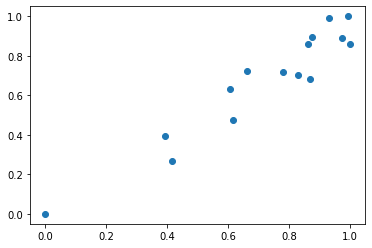

In [93]:
plt.scatter(scaled_data["sp500"], scaled_data["nasdaq"])

In [94]:
import seaborn as sns

<AxesSubplot:>

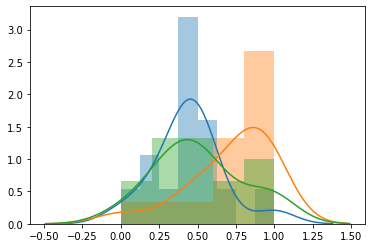

In [98]:
sns.distplot(scaled_data[["BTC_price"]])
sns.distplot(scaled_data[["sp500"]])
sns.distplot(scaled_data[["kospi"]])

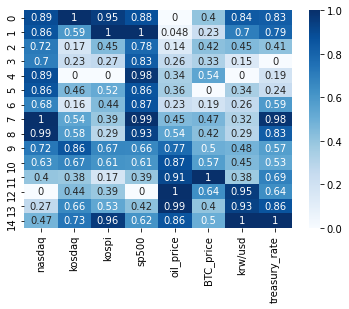

In [103]:
sns.heatmap(scaled_data, annot=True, cmap="Blues")
plt.show()

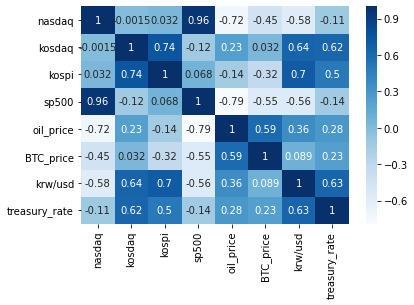

In [101]:
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

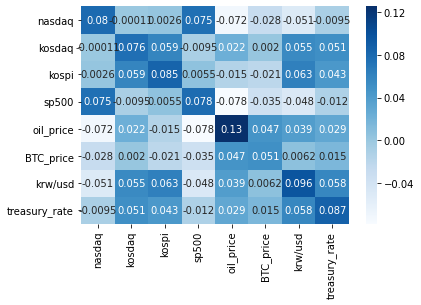

In [102]:
sns.heatmap(cov, annot=True, cmap="Blues")
plt.show()

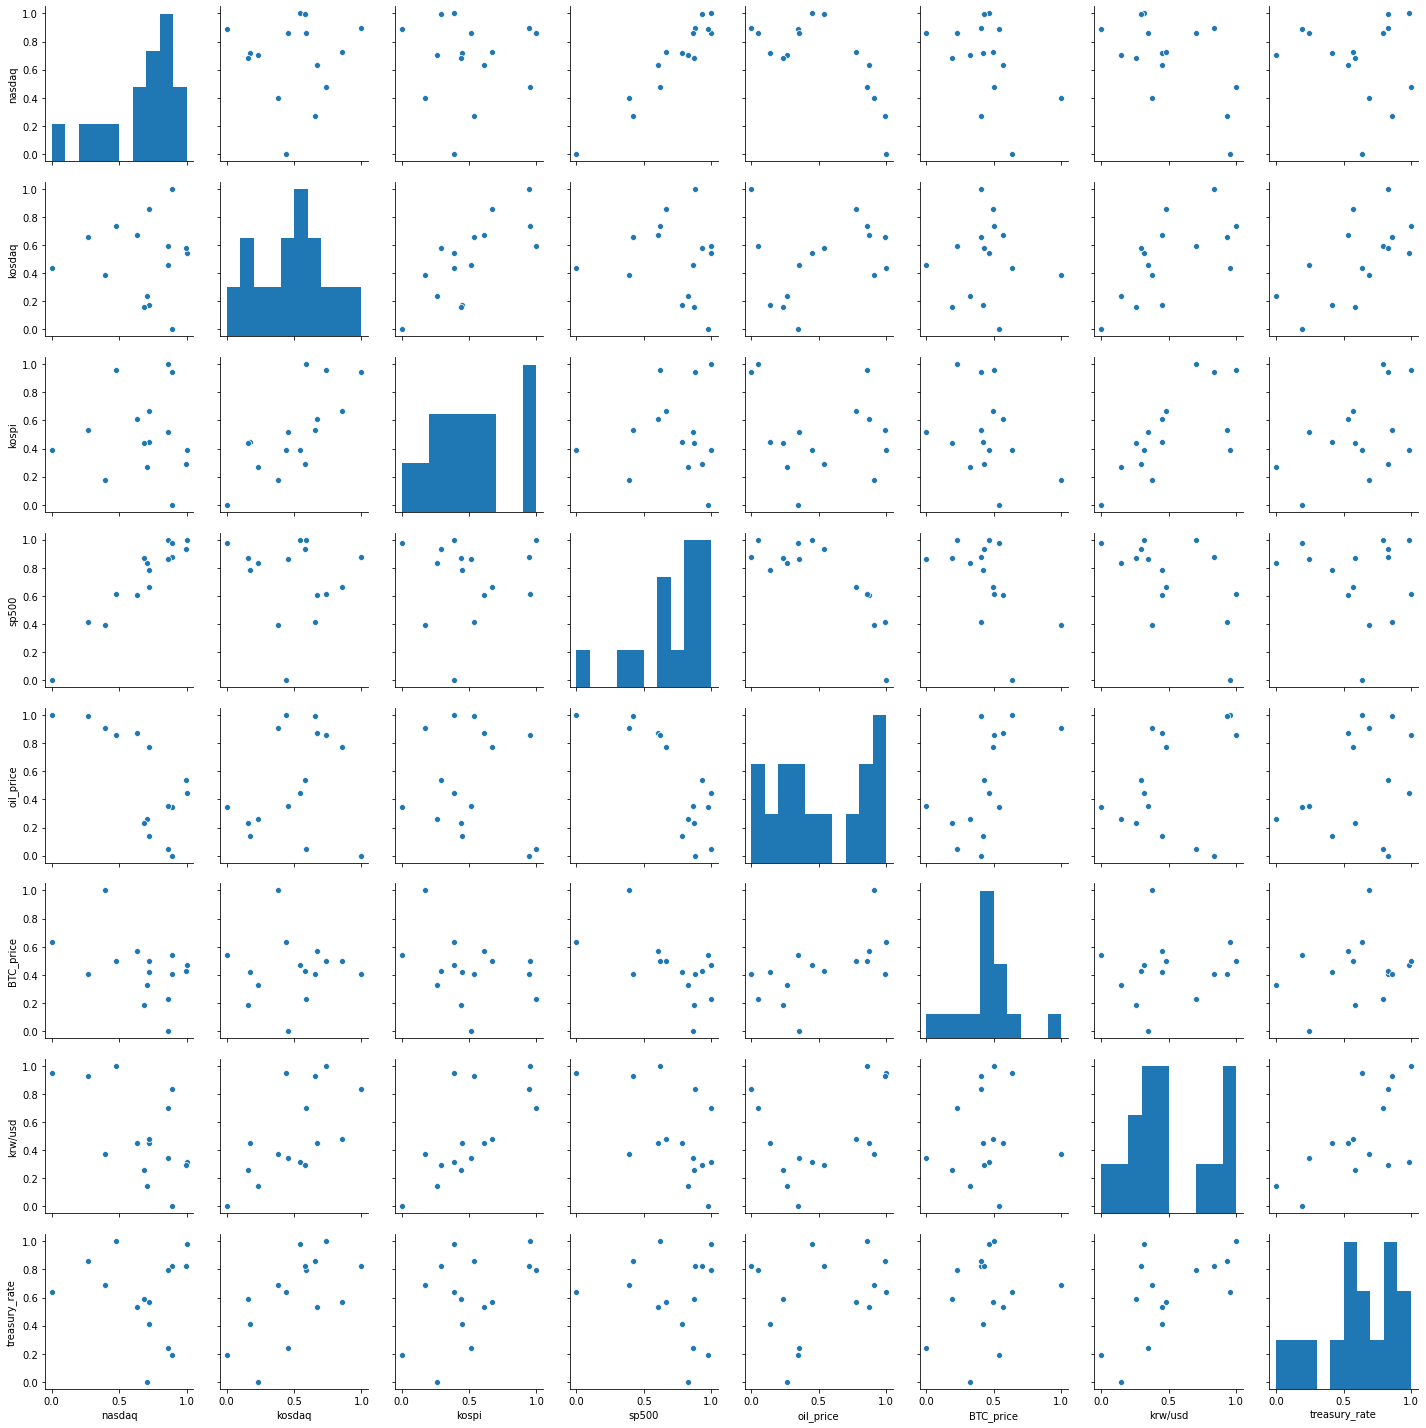

In [123]:
sns.pairplot(scaled_data)